(HW4)=
# HW4

## Task 4.1 (0.5 points)

A bridge player had no ace in three consecutive hands. What is the probability of this event? Did he have reason to complain of ill luck? A hand consists of $13$ random cards drawn out of $52$.

### YOUR SOLUTION HERE

A standard deck of cards has 52 cards, with 4 aces. Therefore, there are 48 cards that are not aces. When drawing 13 cards , the number of ways to choose 13 cards from the 48 non-aces is С(48,13). The total number of ways to draw 13 cards from the deck is C(52,13). Thus, the probability of not getting an ace in a single hand is $$\frac{С(48,13)}{C(52,13)}$$

Since the hands are drawn independently, the probability of this event happening three times: $$\frac{С(48,13)}{C(52,13)}^3$$


Still, the probability of 2.8% is quite low, so I think he has reason to consider it bad luck

In [5]:
from scipy.special import comb

comb_without_aces = comb(48, 13)
total = comb(52, 13)

probability_single_hand = comb_without_aces / total

probability_three_hands = probability_single_hand ** 3

probability_three_hands

0.02804390408892508

## Task 4.2 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE

Let's present a theoretical proof of why $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$

Firstly, find the cumulative distribution function (CDF) of the k-th order statistic $x_{(k)}$

The probability that $x_{(k)}$ is less than or equal to a value $x_{(n)}$ is the same as the probability that at least k of the n samples are less than or equal to x.

This can be calculated by summing the probabilities of exactly k,k+1,…,n of the samples being less than or equal to  x, each of which follows a binomial distribution.

$$F_{x_{k}} (x) = \sum\limits_{j = k}^n \binom nj x^j (1-x)^{n-j}$$


This sum can be recognized as the CDF of a Beta distribution. Specifically, the Beta distribution's PDF, which is derived from its CDF, is proportional to $x^{\alpha - 1} (1-x)^{\beta -1}$ where $\alpha = k$ and $\beta = n + 1 -k$. The match between the derived CDF and the Beta CDF shows that  $$x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$$

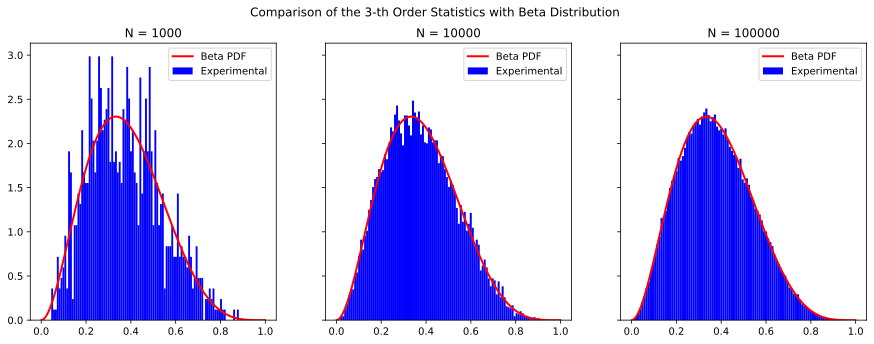

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


def draw_beta_hist(a,b):
    k = a
    n = b + a - 1
    Ns = [1000, 10000, 100000]
    
    # Plot setup
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    fig.suptitle(f'Comparison of the {k}-th Order Statistics with Beta Distribution')

    for i, N in enumerate(Ns):
        
        random_matrix = np.random.uniform(low=0.0, high=1.0, size=(N, n))

        kth_order_statistic = np.sort(random_matrix, axis=1)[:, k-1]

        axs[i].hist(kth_order_statistic, bins=100, density=True, color = 'b', label='Experimental')

        x = np.linspace(0.001, 0.999, 1000)
        axs[i].plot(x, beta.pdf(x, k, n+1-k), 'r', lw=2, label='Beta PDF')

        axs[i].set_title(f'N = {N}')
        axs[i].legend()

    plt.show()
    
draw_beta_hist(3,5)

## Task 4.3 (1 point)

Calculate entropy of $\mathcal N(\mu, \sigma^2)$. Plot the graph of this entropy as function of $\sigma$. What is the limit of this function as $\sigma \to +0$? $\sigma \to +\infty$?


### YOUR SOLUTION HERE

<!-- p_\xi(x) = \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}. -->

$$\mathbb H\xi = -\int p_{\xi}(x) \log p_{\xi}(x)\, dx = -\int \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \log \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\, dx = \int{-\dfrac{\ln\left(\frac{1}{\sqrt{2}\,\sqrt{\pi}\,\sigma}\right)-\dfrac{\left({x-\mu}\right)^{2}}{2\,{\sigma}^{2}}}{\sqrt{2}\,\sqrt{\pi}\,\sigma\,{e}^{\frac{\left({x-\mu}\right)^{2}}{2\,{\sigma}^{2}}}}}{\;\mathrm{d}x}=\dfrac{\left|\sigma\right|\,\ln\left(\sqrt{2}\,\sqrt{\pi}\,\sigma\right)\,\operatorname{erf}\left(\dfrac{x-\mu}{\sqrt{2}\,\left|\sigma\right|}\right)}{2\,\sigma}+\dfrac{\left|\sigma\right|\,\operatorname{erf}\left(\dfrac{x-\mu}{\sqrt{2}\,\left|\sigma\right|}\right)}{4\,\sigma}-\dfrac{x\,{e}^{\frac{-{x}^{2}-{\mu}^{2}}{2\,{\sigma}^{2}}+\frac{\mu\,x}{{\sigma}^{2}}}}{2\,\sqrt{2}\,\sqrt{\pi}\,\sigma}+\dfrac{\mu\,{e}^{\frac{-{x}^{2}-{\mu}^{2}}{2\,{\sigma}^{2}}+\frac{\mu\,x}{{\sigma}^{2}}}}{2\,\sqrt{2}\,\sqrt{\pi}\,\sigma}+C$$

Let's take a certain integral from minus infinity to plus infinity

$$\mathbb H\xi = \log(\sqrt{2\pi}\sigma) + \frac 1{2}$$ 



As $\sigma \to +0$ The entropy approaches a minimum value. Mathematically, the limit can be considered as approaching negative infinity but practically, in the context of entropy, this represents a state of minimum uncertainty or disorder.

As $\sigma \to +\infty$ The entropy tends to infinity.

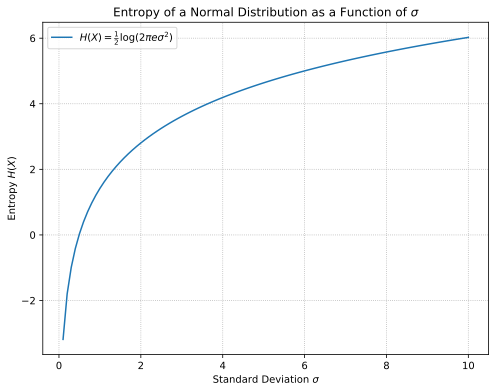

In [25]:
def entropy_normal(sigma):
    return 0.5 + np.log(np.sqrt(2 * np.pi) * sigma**2)


sigma_values = np.linspace(0.1, 10, 100)

entropy_values = entropy_normal(sigma_values)


plt.figure(figsize=(8, 6))
plt.plot(sigma_values, entropy_values, label=r'$H(X) = \frac{1}{2} \log(2\pi e \sigma^2)$')
plt.xlabel(r'Standard Deviation $\sigma$')
plt.ylabel('Entropy $H(X)$')
plt.title('Entropy of a Normal Distribution as a Function of $\sigma$')
plt.legend()
plt.grid(ls = ":")
plt.show()

## Task 4.4 (1 point)

Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$.

### YOUR SOLUTION HERE
1) Kullback–Leibler divergence measures distance between two probability distributions. KL divergence is calculated as:
$$\mathbb{KL}(p\vert\vert q) = \sum\limits_k p_k\log\frac{p_k}{q_k}$$

Given two geometric distributions p and q with parameters s and t respectively, where the probability mass function (PMF) of a geometric distribution is given by $$P(X=k)=(1−p)^{k-1} \cdot p$$

For $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$ their PMFs are:
$$p(k) = (1-s)^{k-1} \cdot s$$
$$q(k) = (1-t)^{k-1} \cdot t$$


$$\mathbb{KL}(p\vert\vert q) = \sum\limits_{k=1} (1-s)^{k-1} \cdot s\log\frac{(1-s)^{k-1} \cdot s}{(1-t)^{k-1} \cdot t} = \sum\limits_{k=1} (1-s)^{k-1} \cdot s(\log\frac{s}{t} + (k-1)\log\frac{(1-s)}{(1-t)}) $$


2) When s=t: The KL divergence should be 0 since the distributions are identical. p(x)=q(x) for all x and $\log(1) = 0$ for all terms in the sum.


3) In general, $\mathbb{KL}(p, q) \neq \mathbb{KL}(q, p)$. KL divergence is not symmetric.

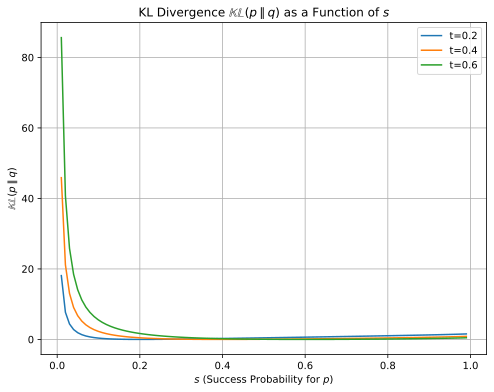

In [35]:
def KL_divergence_geom(s, t):
    return np.log(s / t) + ((1 - s) / s) * np.log((1 - s) / (1 - t))

# Values of s and t
s_values = np.linspace(0.01, 0.99, 100)
t_values = [0.2, 0.4, 0.6]  

# Plotting
plt.figure(figsize=(8, 6))
for t in t_values:
    kl_divergences = [KL_divergence_geom(s, t) for s in s_values]
    plt.plot(s_values, kl_divergences, label=f't={t}')

plt.title('KL Divergence $\mathbb{KL}(p \parallel q)$ as a Function of $s$')
plt.xlabel('$s$ (Success Probability for $p$)')
plt.ylabel('$\mathbb{KL}(p \parallel q)$')
plt.legend()
plt.grid(True)
plt.show()
